<h2>author: :Michal Karolczak</h2>
<h1>Capstone Project - The Battle of Neighborhoods</h1>


<h2>Introduction: Business Problem</h2>
The aim of this project is to find the best locations for French Bakery (pâtisserie) in the New York City area. Specifically, this report will be targeted to stakeholders who are interested in <b>opening a French Bakery in New York, USA.</b><br><br>
    New York is one the biggest cities in the world. It's both one of the largest economical center of the world and one of the most popular tourist attraction. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles and a gross metropolitan product (GMP) of $2.0 trillion makes New York one of the most popular places to invest and open business there. There are many bakeries in NYC, we will conclude whare are the existing bakeries and also find locations where there are none. The report will explore in which neighborhoods and boroughs of NYC the most  bakeries are located and where to open new French bakery.

<h2>Problem description:</h2>
A Bakery is a place where someone can usually buy breakfeast or some small-medium snack. French bakery specializes in french bread, pastries and sweets which allows it to run both as morning place to buy bread and also as a place to buy takeaway or get a small-medium lunch
It's a competetive market so some assumptions have been made:<br>
    1. it would be good to open new bakery where there are none or small number of bakeries<br>
    2. as a hint for finding the best place it would be good to find locations with French Restaurants as bakery won't be the competitions to the restaurant (offers small takeaway meals) but would be located near other French joints - People in the area might be interested in additional French meals<br>

<h2>Data</h2>
In order to find the answers for the problems provided we need:

1. a dataset that contains all 5 NYC boroughs and all of the neighborhoods (306) that exist in each borough as well as the the latitude and longitude coordinates of each neighborhood.
NY CITY DATA SET has all these information:<br>
https://cocl.us/new_york_dataset <br>
DataSet is in csv format and it's free and available to download.
Data set can provide us the below information:<br>
-Borough - borough name,<br>
-Neighborhood - neighbourhood name,<br>
-Latitude - latitute of the neighborhood,<br>
-Longitude - longtitude of the neighborhood<br>
which is enough to visualize Neighbourhoods and use them to query FourSqare data using API<br>
<br>
Example data from the DataSet:<br>
<b>Borough	Neighborhood	Latitude	Longitude</b><br>
0	Bronx	Wakefield	40.894705	-73.847201<br>
1	Bronx	Co-op City	40.874294	-73.829939<br>
2	Bronx	Eastchester	40.887556	-73.827806<br><br>
2. location of current venues (we will filter the Bakeries and French Restaurants). For that we can use FourSquare API:<br>
https://api.foursquare.com/v2/venues/explore <br>
FourSquare API can provide us the below information:<br>
-VenueID (which can be used to identify Venue and get Venue details), <br>
-Venue Name - name of the Venue, <br>
-Venue Location - lat and lng of the Venue,  <br>
-Venue categories - category of the Venue, in our case it will be used to filter Bakeries and French Restaurants<br>

We will use the API with our CLIENT_ID and SECRET to connect to FourSquare. For each neigborhood I will get the data using my own function def getNearbyVenues(names, latitudes, longitudes, boroughs)
Data is returned as JSON with the below format:<br>
    ["response"]['groups'][0]['items']['venue']<br>
    where ["venue"] contains:<br>
-v['venue']['id']<br>
-v['venue']['name'] <br>
-v['venue']['location']['lat']<br> 
-v['venue']['location']['lng']  <br>
-v['venue']['categories']<br><br>

Example data from the DataSet:<br>
    <b>|VenueID               		|Venue	|Venue Latitude	|Venue Longitude	|Venue Category</b><br>
	|4c537892fd2ea593cb077a28	|Lollipops Gelato	|40.894123	|-73.845892	|Dessert Shop<br>
	|4c783cef3badb1f7e4244b54	|Carvel Ice Cream	|40.890487	|-73.848568	|Ice Cream Shop<br>
	|5d5f5044d0ae1c0008f043c3	|Walgreens	|40.896528	|-73.844700	|Pharmacy<br>
	|4d33665fb6093704b80001e0	|Subway	|40.890468	|-73.849152	|Sandwich Place<br>

<h2>Methodology</h2><br>
    1. Download NY Data Set, clean and process the downloaded data and import it to Panda DataFrame<br>
    2. Visualize all the neighborhoods using Folium<br>
    3. Using FourSquare API localize all the bakeries in all the neighbourhoods.<br>
    4. Visualize the 'bakeries in the neighbourhoods' results (HeatMap)<br>
    5. Using FourSquare API data localize all the neighbourhoods without bakeries<br>
    6. Visualize the 'neighbourhoods without bakeries' results (HeatMap)<br>
    7. Using FourSquare API localize all the neighbourhoods with French Restaurants<br>
    8. Use k-means algorithm to group the data (bakeries and French Restaurants)<br>
    9. Analyze and choose the best neighbourhoods among clusters

<h2>Target Audience:</h2>
To recommend the correct location, Bakery Company Ltd has appointed me to lead of the Data Science team. The objective is to locate and recommend to the management which neighborhood of New York city will be best choice to start a bakery. The Management also expects to understand the rationale of the recommendations made.

This would interest anyone who wants to start a new bakery in New York.

<h2>Success Criteria:</h2>
The success criteria of the project will be a good recommendation of borough choice to Bakery Company Ltd based on lack of such venues in that location and popularity of French cousines in the area.

<h2>Analysis</h2>

1. Data preparation:

1.1 Importing and installing all the neccessary libraries

In [4]:
#!conda install -c conda-forge folium --yes
#pip uninstall -y numpy
#!pip install numpy
#pip install numpy==1.18
#!pip install scipy==1.1.0
#!pip install scikit-learn==0.21.3
#!pip install beautifulsoup4
#!pip install lxml
import requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image
from IPython.core.display import HTML
from IPython.display import display_html
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


1.2 Downloading NYC DataSet (JSON file)

In [5]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')
import json # library to handle JSON files

Data downloaded!


1.3 Transform the JSON into Pada Data Frame (all the data is stored in Features attibute)

In [6]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

define the dataframe columns and instantiate the dataframe:

In [7]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

loop using for-loop through the data and fill the dataframe row by row:

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Check the first rows of the new data frame:

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Confirm that data frame has 5 boroughs and 306 neighbourhoods:

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


1.4 Geopy library to get the location value of NYC

In [119]:
def get_coordinates(address):
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    lat = location.latitude
    lng = location.longitude
    
    return [lat, lng]

In [120]:
address = 'New York City, NY'
nyc_geo = get_coordinates(address)
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


1.5 Visualize the NYC with neighborhoods on the map

In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
k = 0
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    k = k + 1
    print(k,neighborhood, ' -------> ',borough )
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
map_newyork

1 Wakefield  ------->  Bronx
2 Co-op City  ------->  Bronx
3 Eastchester  ------->  Bronx
4 Fieldston  ------->  Bronx
5 Riverdale  ------->  Bronx
6 Kingsbridge  ------->  Bronx
7 Marble Hill  ------->  Manhattan
8 Woodlawn  ------->  Bronx
9 Norwood  ------->  Bronx
10 Williamsbridge  ------->  Bronx
11 Baychester  ------->  Bronx
12 Pelham Parkway  ------->  Bronx
13 City Island  ------->  Bronx
14 Bedford Park  ------->  Bronx
15 University Heights  ------->  Bronx
16 Morris Heights  ------->  Bronx
17 Fordham  ------->  Bronx
18 East Tremont  ------->  Bronx
19 West Farms  ------->  Bronx
20 High  Bridge  ------->  Bronx
21 Melrose  ------->  Bronx
22 Mott Haven  ------->  Bronx
23 Port Morris  ------->  Bronx
24 Longwood  ------->  Bronx
25 Hunts Point  ------->  Bronx
26 Morrisania  ------->  Bronx
27 Soundview  ------->  Bronx
28 Clason Point  ------->  Bronx
29 Throgs Neck  ------->  Bronx
30 Country Club  ------->  Bronx
31 Parkchester  ------->  Bronx
32 Westchester Square  

289 Roxbury  ------->  Queens
290 Homecrest  ------->  Brooklyn
291 Middle Village  ------->  Queens
292 Prince's Bay  ------->  Staten Island
293 Lighthouse Hill  ------->  Staten Island
294 Richmond Valley  ------->  Staten Island
295 Malba  ------->  Queens
296 Highland Park  ------->  Brooklyn
297 Madison  ------->  Brooklyn
298 Bronxdale  ------->  Bronx
299 Allerton  ------->  Bronx
300 Kingsbridge Heights  ------->  Bronx
301 Erasmus  ------->  Brooklyn
302 Hudson Yards  ------->  Manhattan
303 Hammels  ------->  Queens
304 Bayswater  ------->  Queens
305 Queensbridge  ------->  Queens
306 Fox Hills  ------->  Staten Island


1.6 Collect the FourSquare data

In [67]:
#FOURSQUARE CREDENTIALS




prepare the function to get the venues based on the latitude and longitute (with default radius of 500). Let's collect Venue ID, Category, Name and Location

In [26]:
def getNearbyVenues(names, latitudes, longitudes, boroughs, radius=500):
    venues_list=[]
    for name, lat, lng, borough in zip(names, latitudes, longitudes, boroughs):
        ##print(name, ' ---> ', borough)  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            v['venue']['id'],
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']
        ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ID',
                  'Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Let's get the Venues for each Neighborhood:

In [27]:
##Let's collect data for all the venues in each neighborhood wit default radius 500
NY_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   boroughs=neighborhoods['Borough']
                                  )


Wakefield  --->  Bronx
Co-op City  --->  Bronx
Eastchester  --->  Bronx
Fieldston  --->  Bronx
Riverdale  --->  Bronx
Kingsbridge  --->  Bronx
Marble Hill  --->  Manhattan
Woodlawn  --->  Bronx
Norwood  --->  Bronx
Williamsbridge  --->  Bronx
Baychester  --->  Bronx
Pelham Parkway  --->  Bronx
City Island  --->  Bronx
Bedford Park  --->  Bronx
University Heights  --->  Bronx
Morris Heights  --->  Bronx
Fordham  --->  Bronx
East Tremont  --->  Bronx
West Farms  --->  Bronx
High  Bridge  --->  Bronx
Melrose  --->  Bronx
Mott Haven  --->  Bronx
Port Morris  --->  Bronx
Longwood  --->  Bronx
Hunts Point  --->  Bronx
Morrisania  --->  Bronx
Soundview  --->  Bronx
Clason Point  --->  Bronx
Throgs Neck  --->  Bronx
Country Club  --->  Bronx
Parkchester  --->  Bronx
Westchester Square  --->  Bronx
Van Nest  --->  Bronx
Morris Park  --->  Bronx
Belmont  --->  Bronx
Spuyten Duyvil  --->  Bronx
North Riverdale  --->  Bronx
Pelham Bay  --->  Bronx
Schuylerville  --->  Bronx
Edgewater Park  --->  B

Homecrest  --->  Brooklyn
Middle Village  --->  Queens
Prince's Bay  --->  Staten Island
Lighthouse Hill  --->  Staten Island
Richmond Valley  --->  Staten Island
Malba  --->  Queens
Highland Park  --->  Brooklyn
Madison  --->  Brooklyn
Bronxdale  --->  Bronx
Allerton  --->  Bronx
Kingsbridge Heights  --->  Bronx
Erasmus  --->  Brooklyn
Hudson Yards  --->  Manhattan
Hammels  --->  Queens
Bayswater  --->  Queens
Queensbridge  --->  Queens
Fox Hills  --->  Staten Island


Let's save the venues in csv as we don't want to reach the limit on FourSquare:

In [28]:
NY_venues.head()

,ID,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4c537892fd2ea593cb077a28,Bronx,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,4c783cef3badb1f7e4244b54,Bronx,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,5d5f5044d0ae1c0008f043c3,Bronx,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,4d33665fb6093704b80001e0,Bronx,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,Sandwich Place
4,508af256e4b0578944c87392,Bronx,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant,40.898083,-73.850259,Caribbean Restaurant


In [29]:
NY_venues.to_csv('NY_venues.csv')

In [137]:
NY_venues_test = pd.read_csv('NY_venues.csv')
#print(NY_venues_test.tail())
print('finished')


finished


Venue Category
French Restaurant    61
Name: ID, dtype: int64

In [ ]:
bakeries=NY_venues[NY_venues['Venue Category']=='Bakery']
print(bakeries.shape)
bakeries.head()

Let's filter the bakeries from the venues DataSet:

In [31]:
bakeries=NY_venues[NY_venues['Venue Category']=='Bakery']
print(bakeries.shape)
bakeries.head()

(205, 9)


,ID,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
46,4f44d4d419836ed00196d410,Bronx,Eastchester,40.887556,-73.827806,Hostess Cakes,40.884608,-73.827487,Bakery
78,4debd81822713dd973b85876,Bronx,Kingsbridge,40.881687,-73.902818,Sugarboy Bakery Cafe,40.877948,-73.902860,Bakery
125,4c69c76396f176b0962fa836,Bronx,Kingsbridge,40.881687,-73.902818,Stella D'oro Biscuit Co,40.883202,-73.900436,Bakery
130,4cab0bf1d971b1f7873327e1,Bronx,Kingsbridge,40.881687,-73.902818,S & S Cheesecake,40.884793,-73.899861,Bakery
145,5802a20c38fa8638a305e241,Manhattan,Marble Hill,40.876551,-73.910660,Auntie Anne's,40.877400,-73.904947,Bakery


So we have 205 bakeries in NYC

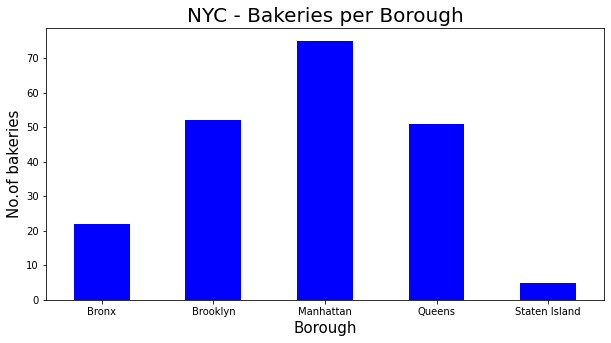

In [34]:
import matplotlib.pyplot as plt
bakeries.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = 'blue')
plt.title('NYC - Bakeries per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of bakeries', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

TOP10 Neighborhoods with most numbers of bakeries:

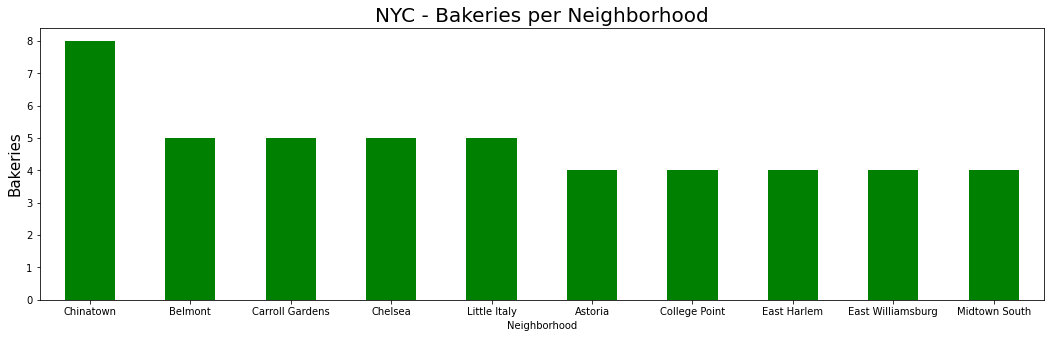

In [43]:
numberOfNeighs = 10 
bakeries.groupby('Neighborhood')['ID'].count().nlargest(numberOfNeighs).plot.bar(figsize=(18,5), color='green')
plt.title('NYC - Bakeries per Neighborhood', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 10)
plt.ylabel('Bakeries', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

Let's prepare function to get Venue details:

In [44]:
def getVenueDetails(venue_id):
    #create the API request URL
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
    # make the GET request
    results = requests.get(url).json()["response"]['venue']
    venue_details=[]
    
    # return only relevant information for the venue
    try:
        venue_id=results['id']
        venue_name=results['name']
        venue_likes=results['likes']['count']
        venue_rating=results['rating']
        venue_tips=results['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Let's get the details for each bakery:

In [50]:
column_names=['Borough', 'Neighborhood', 'ID', 'Name', 'Likes', 'Rating', 'Tips']
bakeries_details_ny=pd.DataFrame(columns=column_names)
i=1
for row in bakeries.values.tolist():
    ID,Borough,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category = row
    try:
        venue_details=getVenueDetails(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
        
        bakeries_details_ny = bakeries_details_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    except IndexError:
        print('Skipping: ',ID, ' -> ', Venue, ' N/B: ', Neighborhood, ' | ', Borough)
        pass
        ## we will skip bakeries for which ID cannot be find
    print('(',i,'/',len(bakeries),')','processed')
    i=i+1


Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
Skipping:  4f44d4d419836ed00196d410  ->  Hostess Cakes  N/B:  Eastchester  |  Bronx
( 1 / 205 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4debd81822713dd973b85876  Sugarboy Bakery Cafe     15     7.8     2
( 2 / 205 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
Skipping:  4c69c76396f176b0962fa836  ->  Stella D'oro Biscuit Co  N/B:  Kingsbridge  |  Bronx
( 3 / 205 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
Skipping:  4cab0bf1d971b1f7873327e1  ->  S & S Cheesecake  N/B:  Kingsbridge  |  Bronx
( 4 / 205 ) processed
                         ID           Name  Likes  Rating  Tips
0  5802a20c38fa8638a305e241  Auntie Anne's      0     7.6     0
( 5 / 205 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
Skipping:  4dab094ccda1652a2b99c1c9  ->  Ana's Bakery & Cafe  N/B:  Pelham Parkway  |  

KeyError: 'venue'

I have a problem with API limits. So I have to download records in more then one run. So I search for last downloaded ID and start resume the process contating foursquare API there:

In [68]:
last_downloaded_id = ''
for row in bakeries.values.tolist():
    ID,Borough,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category = row
    found = bakeries_details_ny[bakeries_details_ny['ID'].str.contains(ID)]
    ##print(found['ID'].count())
    if found['ID'].count() == 0 :
        pass # print('ID not dowloaded: ', ID)
    else:
        last_downloaded_id = ID
        #print('ID Already dowloaded: ', ID)
        
print('Last downloaded ID: ', last_downloaded_id)

i=1
start_api=False
for row in bakeries.values.tolist():
    ID,Borough,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category = row
    #print(ID)
    if ID == last_downloaded_id:
        start_api=True
        print('Last downloaded ID found: ', ID)
    if start_api==True:
        try:
            venue_details=getVenueDetails(ID)
            print(venue_details)
            id,name,likes,rating,tips=venue_details.values.tolist()[0]
        
            bakeries_details_ny = bakeries_details_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
        except IndexError:
            print('Skipping: ',ID, ' -> ', Venue, ' N/B: ', Neighborhood, ' | ', Borough)
            pass
            ## we will skip bakeries for which ID cannot be find
    print('(',i,'/',len(bakeries),')','processed')
    i=i+1


Last downloaded ID:  5a7660bd646e381165cede73
( 1 / 205 ) processed
( 2 / 205 ) processed
( 3 / 205 ) processed
( 4 / 205 ) processed
( 5 / 205 ) processed
( 6 / 205 ) processed
( 7 / 205 ) processed
( 8 / 205 ) processed
( 9 / 205 ) processed
( 10 / 205 ) processed
( 11 / 205 ) processed
( 12 / 205 ) processed
( 13 / 205 ) processed
( 14 / 205 ) processed
( 15 / 205 ) processed
( 16 / 205 ) processed
( 17 / 205 ) processed
( 18 / 205 ) processed
( 19 / 205 ) processed
( 20 / 205 ) processed
( 21 / 205 ) processed
( 22 / 205 ) processed
( 23 / 205 ) processed
( 24 / 205 ) processed
( 25 / 205 ) processed
( 26 / 205 ) processed
( 27 / 205 ) processed
( 28 / 205 ) processed
( 29 / 205 ) processed
( 30 / 205 ) processed
( 31 / 205 ) processed
( 32 / 205 ) processed
( 33 / 205 ) processed
( 34 / 205 ) processed
( 35 / 205 ) processed
( 36 / 205 ) processed
( 37 / 205 ) processed
( 38 / 205 ) processed
( 39 / 205 ) processed
( 40 / 205 ) processed
( 41 / 205 ) processed
( 42 / 205 ) process

                         ID               Name  Likes  Rating  Tips
0  57c631d0498eba4164616ff7  Orwasher's Bakery    143     9.0    36
( 92 / 205 ) processed
                         ID      Name  Likes  Rating  Tips
0  5d68208694486800083d6166  Barachou      7     8.0     7
( 93 / 205 ) processed
                         ID               Name  Likes  Rating  Tips
0  52cc3c60498e9ec88e3334d2  By the Way Bakery     50     8.4    29
( 94 / 205 ) processed
                         ID           Name  Likes  Rating  Tips
0  56ba9f99498ef6f5b55a33dc  Breads Bakery    196     9.0    43
( 95 / 205 ) processed
                         ID             Name  Likes  Rating  Tips
0  4a271f0bf964a5205b911fe3  Magnolia Bakery    693     8.5   282
( 96 / 205 ) processed
                         ID            Name  Likes  Rating  Tips
0  5e820922dab16c0008ee06e1  Paris Baguette      0     7.6     0
( 97 / 205 ) processed
                         ID          Name  Likes  Rating  Tips
0  4fab5090e4b0eeff

                         ID               Name  Likes  Rating  Tips
0  4be89308947820a13f16b5db  La Vienesa Bakery      3     7.8     8
( 143 / 205 ) processed
                         ID                Name  Likes  Rating  Tips
0  4bf5280594af2d7f0f563b72  Glendale Bake Shop      9     7.7     6
( 144 / 205 ) processed
                         ID             Name  Likes  Rating  Tips
0  4c4c8221f7cc1b8da3d46c41  Grimaldi Bakery     37     7.7    16
( 145 / 205 ) processed
                         ID            Name  Likes  Rating  Tips
0  58a223ad01f07763d106022f  Paris Baguette     15     7.1     2
( 146 / 205 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4bf92790b182c9b64778785a  Andre's Hungarian Bakery     12     7.3    10
( 147 / 205 ) processed
                         ID         Name  Likes  Rating  Tips
0  4c73daca4bc4236af1e8ce7a  Au Bon Pain      0     6.5     1
( 148 / 205 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rat

                         ID             Name  Likes  Rating  Tips
0  4e7393931495dffb8efa57da  Magnolia Bakery    433     8.7   138
( 193 / 205 ) processed
                         ID           Name  Likes  Rating  Tips
0  528c0a8411d22d20135e7756  Eclair Bakery     40     8.1    42
( 194 / 205 ) processed
                         ID                 Name  Likes  Rating  Tips
0  46102377f964a52025451fe3  Buttercup Bake Shop    100     8.6    69
( 195 / 205 ) processed
                         ID           Name  Likes  Rating  Tips
0  503fb6d4ebca66a84f029bd8  Breads Bakery    434     9.1   330
( 196 / 205 ) processed
                         ID            Name  Likes  Rating  Tips
0  5834df25102f475d15a3cd1a  Paris Baguette     21     8.5     3
( 197 / 205 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
Skipping:  50bd464be4b0895ab4ca0a9b  ->  Lety Bakery & Café II  N/B:  Sunnyside Gardens  |  Queens
( 198 / 205 ) processed
                         ID     

Let's check the results:

In [69]:
bakeries_details_ny.tail()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
163,Brooklyn,Fulton Ferry,4f21bb85e5e872143c0ca04b,One Girl Cookies,511,7.1,171
164,Brooklyn,Vinegar Hill,52b204c0498efe3c3be32d91,Burrow,147,8.8,35
165,Brooklyn,Dumbo,52b204c0498efe3c3be32d91,Burrow,147,8.8,35
166,Brooklyn,Dumbo,43504680f964a520b0281fe3,Almondine Bakery,279,8.3,148
167,Brooklyn,Homecrest,4c9e27ea54c8a1cdabb68a4b,Ka Ka Bakery,7,6.4,8


In [71]:
bakeries_details_ny.shape

(168, 7)

Let's save the details to csv file and test if they can be loaded:

In [70]:
bakeries_details_ny.to_csv('bakeries_details_ny.csv')
bakeries_details_ny_test = pd.read_csv('bakeries_details_ny.csv')
print(bakeries_details_ny_test.tail())
print('finished')

     Unnamed: 0   Borough  Neighborhood                        ID  \
163         163  Brooklyn  Fulton Ferry  4f21bb85e5e872143c0ca04b   
164         164  Brooklyn  Vinegar Hill  52b204c0498efe3c3be32d91   
165         165  Brooklyn         Dumbo  52b204c0498efe3c3be32d91   
166         166  Brooklyn         Dumbo  43504680f964a520b0281fe3   
167         167  Brooklyn     Homecrest  4c9e27ea54c8a1cdabb68a4b   

                 Name  Likes  Rating  Tips  
163  One Girl Cookies    511     7.1   171  
164            Burrow    147     8.8    35  
165            Burrow    147     8.8    35  
166  Almondine Bakery    279     8.3   148  
167      Ka Ka Bakery      7     6.4     8  
finished


we have to check if Panda has coorectly identified our data:

In [72]:
bakeries_details_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       168 non-null    object 
 1   Neighborhood  168 non-null    object 
 2   ID            168 non-null    object 
 3   Name          168 non-null    object 
 4   Likes         168 non-null    object 
 5   Rating        168 non-null    float64
 6   Tips          168 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.3+ KB


Like and Tips are identified as object. Conversion to float64

In [73]:
bakeries_details_ny['Likes']=bakeries_details_ny['Likes'].astype('float64')
bakeries_details_ny['Tips']=bakeries_details_ny['Tips'].astype('float64')
bakeries_details_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       168 non-null    object 
 1   Neighborhood  168 non-null    object 
 2   ID            168 non-null    object 
 3   Name          168 non-null    object 
 4   Likes         168 non-null    float64
 5   Rating        168 non-null    float64
 6   Tips          168 non-null    float64
dtypes: float64(3), object(4)
memory usage: 9.3+ KB


Let's group the data by Neighborhood and rating, then sort it descending

In [74]:
bakeries_grouped_Neigh=bakeries_details_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
bakeries_grouped_Neigh.columns=['Neighborhood','Average Rating']
bakeries_grouped_Neigh.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
33,Greenwich Village,9.2
58,Pelham Bay,9.2
25,Flatiron,9.1
66,South Side,9.1
3,Bayside,9.0
56,Old Town,8.9
32,Greenpoint,8.8
55,Ocean Hill,8.8
22,East Village,8.8
67,Steinway,8.8


In [75]:
bakeries_grouped_Borough=bakeries_details_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
bakeries_grouped_Borough.columns=['Borough','Average Rating']
bakeries_grouped_Borough.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Average Rating
2,Manhattan,8.296000
4,Staten Island,8.200000
1,Brooklyn,7.873913
0,Bronx,7.700000
3,Queens,7.656250


    Let's check neighbourhoods by number of bakeries, including neighbourhoods without bakeries.
    So let's group the bakeries DataFrame (the one without all the details)

In [110]:
ny_neigh_with_bakeries_Count = bakeries.groupby(['Neighborhood'],as_index=False).agg({'ID':['count']})
ny_neigh_with_bakeries_Count.columns = ['Neighborhood','BakeriesCount']
ny_neigh_with_bakeries_Count.sort_values(['BakeriesCount'],ascending=False,inplace=True)
ny_neigh_with_bakeries_Count.head(15)

,Neighborhood,BakeriesCount
15,Chinatown,8
52,Little Italy,5
14,Chelsea,5
6,Belmont,5
12,Carroll Gardens,5
102,Woodside,4
94,Upper West Side,4
93,Upper East Side,4
82,Soho,4
68,North Side,4


Let's merge it with full neighborhoods data (neighborhoods DataFrame):

In [126]:
ny_neighborhood_with_bakeryCount = neighborhoods.merge(ny_neigh_with_bakeries_Count, on='Neighborhood',how='left') #pd.merge(neighborhoods,bakeries_grouped_Neigh, on='Neighborhood')
ny_neighborhood_with_bakeryCount=ny_neighborhood_with_bakeryCount[['Borough','Neighborhood','Latitude','Longitude','BakeriesCount']]

ny_neighborhood_with_bakeryCount_WithoutNAN =ny_neighborhood_with_bakeryCount.dropna()

ny_neighborhood_with_bakeryCount['BakeriesCount'] = ny_neighborhood_with_bakeryCount['BakeriesCount'].fillna(0)
ny_neighborhood_with_bakeryCount.sort_values(['BakeriesCount'],ascending=False,inplace=True)
ny_neighborhood_with_bakeryCount.head()

,Borough,Neighborhood,Latitude,Longitude,BakeriesCount
100,Manhattan,Chinatown,40.715618,-73.994279,8.0
121,Manhattan,Little Italy,40.719324,-73.997305,5.0
116,Manhattan,Chelsea,40.744035,-74.003116,5.0
34,Bronx,Belmont,40.857277,-73.888452,5.0
66,Brooklyn,Carroll Gardens,40.680540,-73.994654,5.0


Let's visualize the data. Show the heatmap with number of bakeries:

In [127]:
from folium import plugins
from folium.plugins import HeatMap
bakeries_latlng= ny_neighborhood_with_bakeryCount_WithoutNAN[['Latitude','Longitude']].values.tolist()

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_newyork)
HeatMap(bakeries_latlng).add_to(map_newyork)

folium.Marker(nyc_geo).add_to(map_newyork)
folium.Circle(nyc_geo, radius=1500, fill=False, color='white').add_to(map_newyork)
folium.Circle(nyc_geo, radius=2500, fill=False, color='white').add_to(map_newyork)
folium.Circle(nyc_geo, radius=3500, fill=False, color='white').add_to(map_newyork)

# add office markers to map
for lat,lng,neigh, bakcount in zip(ny_neighborhood_with_bakeryCount_WithoutNAN['Latitude'],ny_neighborhood_with_bakeryCount_WithoutNAN['Longitude'],ny_neighborhood_with_bakeryCount_WithoutNAN['Neighborhood'],ny_neighborhood_with_bakeryCount_WithoutNAN['BakeriesCount']):
    label = '{}, {}'.format(neigh,bakcount)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)

# show the map
map_newyork


Let's show neighbourhoods without the bakery:

In [130]:
## getting only the data where there is value of 0 
ny_neighborhood_withoutBakeries = ny_neighborhood_with_bakeryCount.loc[(ny_neighborhood_with_bakeryCount==0).any(1)]
ny_neighborhood_withoutBakeries.head()

,Borough,Neighborhood,Latitude,Longitude,BakeriesCount
291,Staten Island,Prince's Bay,40.526264,-74.201526,0.0
212,Staten Island,Oakwood,40.558462,-74.121566,0.0
213,Staten Island,Great Kills,40.549480,-74.149324,0.0
224,Staten Island,Park Hill,40.609190,-74.080157,0.0
297,Bronx,Bronxdale,40.852723,-73.861726,0.0


In [131]:
from folium import plugins
from folium.plugins import HeatMap
bakeries_latlng= ny_neighborhood_withoutBakeries[['Latitude','Longitude']].values.tolist()

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_newyork)
HeatMap(bakeries_latlng).add_to(map_newyork)

folium.Marker(nyc_geo).add_to(map_newyork)
folium.Circle(nyc_geo, radius=1500, fill=False, color='white').add_to(map_newyork)
folium.Circle(nyc_geo, radius=2500, fill=False, color='white').add_to(map_newyork)
folium.Circle(nyc_geo, radius=3500, fill=False, color='white').add_to(map_newyork)

# add office markers to map
for lat,lng,neigh, bakcount in zip(ny_neighborhood_withoutBakeries['Latitude'],ny_neighborhood_withoutBakeries['Longitude'],ny_neighborhood_withoutBakeries['Neighborhood'],ny_neighborhood_withoutBakeries['BakeriesCount']):
    label = '{}, {}'.format(neigh,bakcount)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)

# show the map
map_newyork


In [132]:
ny_neighborhood_with_avgRating = neighborhoods.merge(bakeries_grouped_Neigh, on='Neighborhood',how='left') #pd.merge(neighborhoods,bakeries_grouped_Neigh, on='Neighborhood')
ny_neighborhood_with_avgRating=ny_neighborhood_with_avgRating[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_with_avgRating.head()
ny_neighborhood_with_avgRating['Average Rating'] = ny_neighborhood_with_avgRating['Average Rating'].fillna(0)

As we are opening French bakery maybe a good idea is to check other French venues in NYC. Let's get the word 'French' from venues:

In [140]:
#Let's check Bakery category and how many are there
french_restaurant = NY_venues[NY_venues['Venue Category'].str.contains('French')]
print(french_restaurant.head())
french_restaurant.groupby('Venue Category')['ID'].count()

                            ID   Borough Neighborhood  Neighborhood Latitude  \
260   4d7aa83ee540f04d66ba16dc     Bronx  City Island              40.847247   
1185  5bf358689fca56002c251a87  Brooklyn   Greenpoint              40.730201   
1221  58fd34584382ab70ad90083e  Brooklyn   Greenpoint              40.730201   
1620  55e47d26498e44d12c7c004e  Brooklyn     Bushwick              40.698116   
1819  4f7f8b86e4b088077df30175  Brooklyn  Cobble Hill              40.687920   

      Neighborhood Longitude          Venue  Venue Latitude  Venue Longitude  \
260               -73.786488      Bistro SK       40.846387       -73.786262   
1185              -73.954241        Citroën       40.731173       -73.954523   
1221              -73.954241  Chez Ma Tante       40.726932       -73.957250   
1620              -73.925258      Le Garage       40.699312       -73.926591   
1819              -73.998561       Chez Moi       40.690654       -73.995777   

         Venue Category  
260   French

Venue Category
French Restaurant    61
Name: ID, dtype: int64

There is only one 'French' catergory which is 'French Restaurant' - 61 venues like this. Let's visualize it:

In [142]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
k = 0
for lat, lng, borough, neighborhood in zip(french_restaurant['Venue Latitude'], french_restaurant['Venue Longitude'], french_restaurant['Borough'], french_restaurant['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    k = k + 1
    #print(k,neighborhood, ' -------> ',borough )
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
map_newyork

Let's group the 'French Restaurant' data:

In [143]:
ny_neigh_with_FrenchRest_Count = french_restaurant.groupby(['Neighborhood'],as_index=False).agg({'ID':['count']})
ny_neigh_with_FrenchRest_Count.columns = ['Neighborhood','FrRestaurCount']
ny_neigh_with_FrenchRest_Count.sort_values(['FrRestaurCount'],ascending=False,inplace=True)
ny_neigh_with_FrenchRest_Count.head(15)

,Neighborhood,FrRestaurCount
9,Civic Center,4
7,Chelsea,3
36,Turtle Bay,3
12,Cobble Hill,2
10,Clinton,2
22,Lincoln Square,2
18,Greenpoint,2
17,Fort Greene,2
33,Sutton Place,2
34,Tribeca,2


In [144]:
ny_neighborhood_with_bakeryCount_and_FrenchRest = ny_neighborhood_with_bakeryCount.merge(ny_neigh_with_FrenchRest_Count, on='Neighborhood',how='left') #pd.merge(neighborhoods,bakeries_grouped_Neigh, on='Neighborhood')
ny_neighborhood_with_bakeryCount_and_FrenchRest=ny_neighborhood_with_bakeryCount_and_FrenchRest[['Borough','Neighborhood','Latitude','Longitude','BakeriesCount','FrRestaurCount']]

ny_neighborhood_with_bakeryCount_and_FrenchRest_WithoutNAN =ny_neighborhood_with_bakeryCount_and_FrenchRest.dropna()

ny_neighborhood_with_bakeryCount_and_FrenchRest['FrRestaurCount'] = ny_neighborhood_with_bakeryCount_and_FrenchRest['FrRestaurCount'].fillna(0)
ny_neighborhood_with_bakeryCount_and_FrenchRest.sort_values(['FrRestaurCount'],ascending=False,inplace=True)
ny_neighborhood_with_bakeryCount_and_FrenchRest.head()

,Borough,Neighborhood,Latitude,Longitude,BakeriesCount,FrRestaurCount
35,Manhattan,Civic Center,40.715229,-74.005415,2.0,4.0
103,Manhattan,Turtle Bay,40.752042,-73.967708,1.0,3.0
2,Manhattan,Chelsea,40.744035,-74.003116,5.0,3.0
5,Staten Island,Chelsea,40.594726,-74.189560,5.0,3.0
78,Manhattan,Clinton,40.759101,-73.996119,1.0,2.0


Let's normalize this data and cluster it:


In [184]:
from sklearn.preprocessing import StandardScaler
dataprep = ny_neighborhood_with_bakeryCount_and_FrenchRest[['BakeriesCount','FrRestaurCount']]
#X = dataprep.values[:,1:]
#X = np.nan_to_num(X)
#cluster_dataset = StandardScaler().fit_transform(X)
print(dataprep)
num_clusters = 16
kclusters = num_clusters
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12, random_state=0)
k_means.fit(dataprep)
labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers
print(labels)

     BakeriesCount  FrRestaurCount
35             2.0             4.0
103            1.0             3.0
2              5.0             3.0
5              5.0             3.0
78             1.0             2.0
..             ...             ...
128            0.0             0.0
129            0.0             0.0
130            0.0             0.0
131            0.0             0.0
305            0.0             0.0

[306 rows x 2 columns]
[ 7 13  8  8 13  2 12 12 12 12 13 12 12 12 13  8  2  1  9  3  9  1 15 15
 15  3  3  3  9  9  9  9 14  1  1  9  9 14  1 14  3  3  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  4  4  4  4  4  4  4  4  0  4  4  4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (23). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (22) found smaller tha

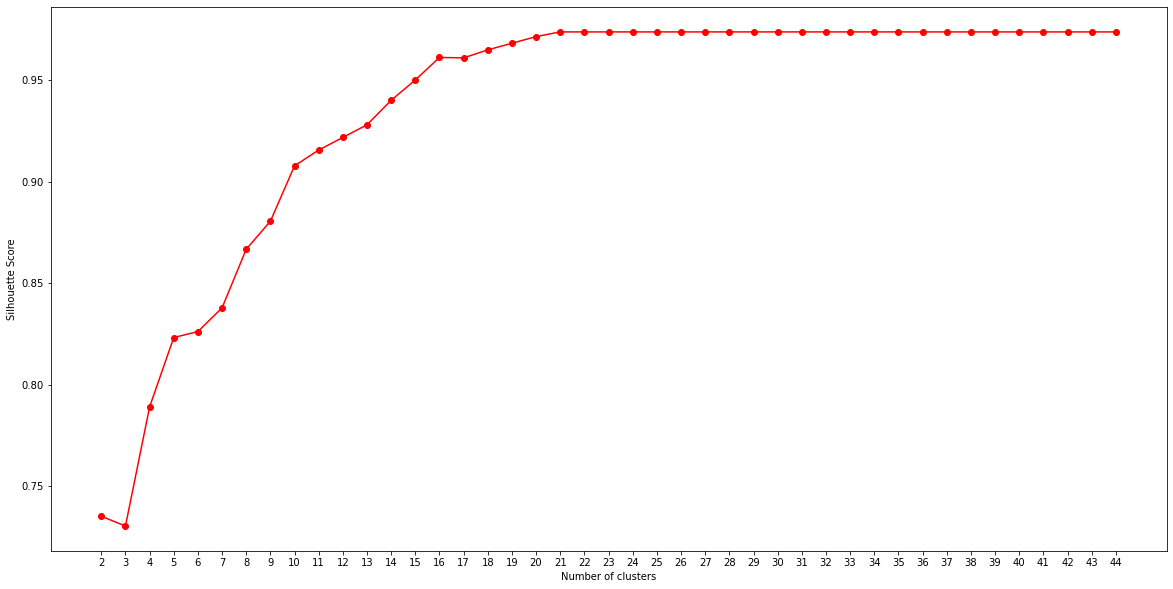

In [183]:
from sklearn.metrics import silhouette_samples, silhouette_score
max_score = 45
scores = []

for kclusters in range(2, max_score):
    # Run k-means clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(dataprep)
    
    # Gets the silhouette score
    score = silhouette_score(dataprep, kmeans)
    scores.append(score)

plt.figure(figsize=(20,10))
plt.plot(np.arange(2, max_score), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_score))
plt.show()

In [185]:
dataprep["Labels"] = labels
dataprep.shape
dataprep.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,BakeriesCount,FrRestaurCount,Labels
35,2.0,4.0,7
103,1.0,3.0,13
2,5.0,3.0,8
5,5.0,3.0,8
78,1.0,2.0,13


In [186]:
dataprep.groupby('Labels').mean()

,BakeriesCount,FrRestaurCount
Labels,,
0,0.000000,0.000000
1,4.200000,1.200000
2,0.000000,2.000000
3,2.000000,1.000000
4,1.000000,0.000000
5,2.000000,0.000000
6,8.000000,0.000000
7,2.000000,4.000000
8,5.000000,2.666667


We can teoreticaly assume that clusters with high number of french restaurants and small number of Bakeries can be potentially a good match:

The best are: <br>
Clusters: 2 and 13

In [187]:
ny_neighborhood_with_bakeryCount_and_FrenchRest["Labels"] = labels
ny_neighborhood_with_bakeryCount_and_FrenchRest.head()

,Borough,Neighborhood,Latitude,Longitude,BakeriesCount,FrRestaurCount,Labels
35,Manhattan,Civic Center,40.715229,-74.005415,2.0,4.0,7
103,Manhattan,Turtle Bay,40.752042,-73.967708,1.0,3.0,13
2,Manhattan,Chelsea,40.744035,-74.003116,5.0,3.0,8
5,Staten Island,Chelsea,40.594726,-74.189560,5.0,3.0,8
78,Manhattan,Clinton,40.759101,-73.996119,1.0,2.0,13


In [189]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhood_with_bakeryCount_and_FrenchRest['Latitude'], ny_neighborhood_with_bakeryCount_and_FrenchRest['Longitude'], ny_neighborhood_with_bakeryCount_and_FrenchRest['Neighborhood'], ny_neighborhood_with_bakeryCount_and_FrenchRest['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if (cluster == 2 or cluster == 13 ):
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [191]:
ny_neighborhood_with_bakeryCount_and_FrenchRest.loc[ny_neighborhood_with_bakeryCount_and_FrenchRest['Labels'] == 2]

,Borough,Neighborhood,Latitude,Longitude,BakeriesCount,FrRestaurCount,Labels
288,Manhattan,Central Harlem,40.815976,-73.943211,0.0,2.0,2
211,Brooklyn,Fort Greene,40.688527,-73.972906,0.0,2.0,2


In [190]:
ny_neighborhood_with_bakeryCount_and_FrenchRest.loc[ny_neighborhood_with_bakeryCount_and_FrenchRest['Labels'] == 13]

,Borough,Neighborhood,Latitude,Longitude,BakeriesCount,FrRestaurCount,Labels
103,Manhattan,Turtle Bay,40.752042,-73.967708,1.0,3.0,13
78,Manhattan,Clinton,40.759101,-73.996119,1.0,2.0,13
90,Brooklyn,Greenpoint,40.730201,-73.954241,1.0,2.0,13
72,Manhattan,Tribeca,40.721522,-74.010683,1.0,2.0,13


<h2>Results / Conclusion </h2>

<h3>Manhattan and Brooklyn are the boroughs were French Restaurants are operating which give us a hint that there is a chance for French Bakery in the area. From the clustered data we have selected the clusters where number of bakeries is low (Cluster No 2 - No bakeries at all, Cluster No 13 - one bakery in the Neighborhood) </h3>
<h3>We have also indetified neighborhoods without any bakeries where is a high change of success to open one. Largest areas according to our HeatMap is around Queens, Hilcrest and Staten Island, Fox Hills.</h3>
<h3>I would open French Bakery in Brooklyn, Fort Greene as this area do not have any bakeries but have French Restaurants. DownTown and Dumbo which are quite far are the nearest locations with Bakeries (2 per neighborhood).</h3>
<h4>As a final note, all of the above analysis is depended on the adequacy and accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.</h4>